# SUMMARIZATION TECHNIQUES

## USE OF DATASETS WITH GROUND TRUTH FOR COMPARING THE DIFFERENT SUMMARIZATION TECHNIQUES

### SECOND DATASET - MULTINEWS WITH DISCUSSION ABOUT A VETERANS PAYMENT

In [1]:
import pandas as pd
import re

# Define the file paths
src_file = 'datasets/multi_news/val.txt.src'  
tgt_file = 'datasets/multi_news/val.txt.tgt' 

# Load the .txt.src file (source articles)
with open(src_file, 'r', encoding='utf-8') as src:
    articles = src.readlines()

# Load the .txt.tgt file (target summaries)
with open(tgt_file, 'r', encoding='utf-8') as tgt:
    summaries = tgt.readlines()

dict_multinews = {'articles': articles, 
                 'summary': summaries}


# Create DataFrames
multinews_df = pd.DataFrame(dict_multinews)

# Clean the newlines from both columns
multinews_df['articles'] = multinews_df['articles'].str.strip()
multinews_df['summary'] = multinews_df['summary'].str.strip()

text = multinews_df.iloc[1].articles
original_summary =  multinews_df.iloc[1].summary
print(f'The summary of the articles is:\n{original_summary}')
articles = text.split('.  ')
articles = [article.strip() for article in articles]


df_sum_3 = pd.DataFrame()
# Assign the list of articles to a new column named 'content'
df_sum_3['content'] = articles

The summary of the articles is:
– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some stu

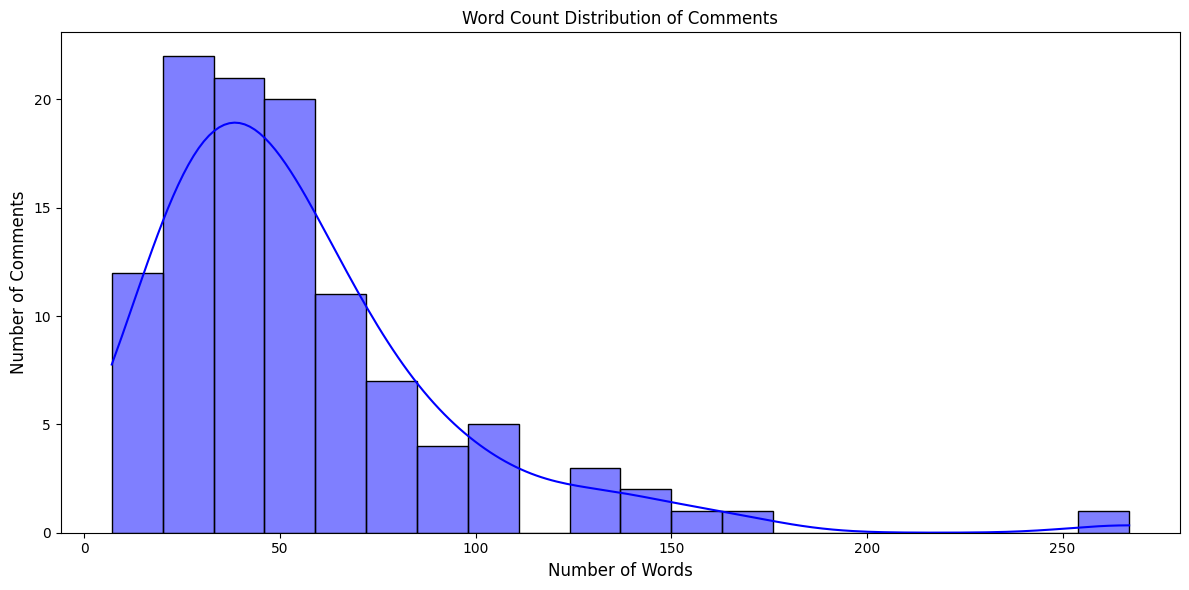

In [2]:
from utils.plot_words_distribution import plot_distribution_of_words

text_col = 'content'

# plot the distribution of words
plot_distribution_of_words(df_sum_3, text_col)

In [3]:
from utils.load_prompts import load_chosen_prompt
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments
from utils.load_pretrained_spacy_model import load_pretrained_model
from sklearn.model_selection import train_test_split

# load the final dataset and the language
df_sum_3, _ = load_pretrained_model(df=df_sum_3, text_col=text_col)

# load the prompt template
prompt_template = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The language of the dataset is: en
The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


### 1ST SUMMARIZATION TECHNIQUE: SEPARATE COMMENTS RANDOMLY INTO GROUPS

We are going to implement a simple technique by grouping the comments/reviews into groups randomly, create a summary for each group of comments and finally a final summarization based on the summaries of group of comments

In [4]:
from summarization_methods.divide_comments_and_summarize import divide_comments_by_time, create_summary_for_groups_of_comments

language = 'English'
topic = "Veterans' GI Bill payment delays"

# divide the comments into groups
groups_1 = divide_comments_by_time(df_sum_3, text_column='content')

#create the summaries
summaries_1 = create_summary_for_groups_of_comments(groups=groups_1, prompt=prompt_template, gpt_model='gpt-4o', language=language, topic=topic)

Comments do not contain timestamp. Continue the group by shuffle them.


  7%|█████████████▌                                                                                                                                                                                             | 1/15 [00:03<00:55,  3.99s/it]

The comments highlight various issues and responses related to delays in Veterans' GI Bill payments. Dr. Hilary Miller, director at the Veterans and Military Family Center at Middle Tennessee State University, mentioned that their institution had to defer tuition and offer short-term loans to affected students, along with providing template letters for landlords explaining the situation (Photo by Mark Zaleski / The Tennessean). A former Army member, Baker, shared that his discharge this summer after 12 years of service left him financially stressed as his GI Bill benefits were delayed, impacting his family dynamics and daily life.

Several comments criticize the VA for not upgrading its technical infrastructure to handle the expanded benefits under the new GI Bill legislation, leading to significant delays. Veterans like one who enrolled a month after discharge have not received their money, intensifying frustration. An aide emphasizes the urgent need for resolution as the VA will not 

 13%|███████████████████████████                                                                                                                                                                                | 2/15 [00:07<00:44,  3.42s/it]

The comments reveal several aspects concerning the delays in Veterans' GI Bill payments. Effective August 1, 2019, there were significant changes, including the elimination of the 15-year limitation for using post-9/11 GI Bill benefits for those discharged on or after January 1, 2013, and for children and spouses of deceased servicemembers. Purple Heart recipients post-September 11, 2001, now receive 100-percent benefits for up to 36 months as of August 1, 2018.

Many schools are mitigating the financial strain through zero-percent interest loans and tuition deferment while encouraging advanced communication about potential delays. Institutions like Middle Tennessee State University prepared for delays by training staff and informing students prior to the spring semester. 

Despite these measures, the payment delays have been impactful, with comments highlighting the prolonged wait times veterans faced even after meeting eligibility criteria. Banchs, noting mid-November as the time whe

 20%|████████████████████████████████████████▌                                                                                                                                                                  | 3/15 [00:13<00:55,  4.66s/it]

The comments cover several key issues and responses related to the delays in Veterans' GI Bill payments. According to VA spokesman Curt Cashour, nationally, fewer than 1,000 veterans have education claims pending for over 60 days, and less than 10,000 have claims pending for over 30 days as of November 28. Despite efforts by the U.S. Department of Veterans Affairs (VA) to address the delays, there is significant criticism regarding the lack of communication and the inaction of the U.S. Senate, leading to severe financial hardships for service members-turned-students. As of this week, the VA is still processing more than 58,000 student aid claims.

Commenters point out that technical schools and non-institutions of higher learning (IHLs) now allow GI Bill beneficiaries to use their educational assistance for accredited independent study programs in area career and technical education schools as well as postsecondary vocational institutions, a change effective from August 16, 2017. Veter

 27%|██████████████████████████████████████████████████████▏                                                                                                                                                    | 4/15 [00:16<00:43,  3.98s/it]

The comments focus on several critical issues surrounding delays in Veterans' GI Bill payments. The inability to make retroactive payments without auditing previous claims is one major point of contention. This would inevitably delay future claims, highlighting systemic inefficiencies within the VA.

One significant change under the new bill includes the calculation of veterans' housing allowances based on the zip code of the school attended, not the veteran's residence. This led to issues when the VA attempted to stress test their outdated systems, compounded by a contract dispute, which delayed student enrollments until mid-July.

Comments also discuss the VA's stance that students overpaid due to these changes will not be held liable for the debt. However, rampant confusion persists as many students were underpaid, and it remains unclear how many are affected and the total amount owed.

The extension of benefits to fields identified by the VA as meeting national needs, such as STEM 

 33%|███████████████████████████████████████████████████████████████████▋                                                                                                                                       | 5/15 [00:19<00:36,  3.66s/it]

The comments illustrate multiple issues surrounding the delays in Veterans' GI Bill payments and the responses to these challenges. Students from some universities reported being unable to afford books, thus hampering their academic productivity. However, Vanderbilt University did not receive any reports from their students about such issues.

Educational institutions were notified about beneficiary entitlements under chapters 30, 32, 33, or 35, with this information accessible through a secure technology system, effective August 1, 2018. The problems primarily stem from the VA's Office of Information Technology, which struggles with outdated systems while implementing changes to how housing allowances are calculated.

Both houses of Congress and the VA's private contractor, Booz Allen Hamilton, pointed out that the antiquated IT systems are central to the delays. A 2016 Government Accountability Office report highlighted that the VA’s benefits delivery platform is over fifty years old

 40%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                                                         | 6/15 [00:22<00:31,  3.49s/it]

The comments center around ongoing delays in Veterans' GI Bill payments, shedding light on various related issues and responses. A significant discussion point is the discrepancy in monthly housing allowances, with individuals who started using benefits on or after January 1, 2018, receiving lower rates based on the Department of Defense’s reduced Basic Housing Allowance (BAH), while those who began earlier receive higher, non-adjusted rates. The technical issues causing the delays are attributed to outdated computer systems at the Department of Veterans Affairs (VA).

There is praise for the House of Representatives unanimously passing the "SIT-REP" bill to shield students from the financial impact of these delays, but frustration persists as the legislation remains stalled in the Senate. Veterans and students across the country have vocalized the financial distress caused by delayed and incorrect payments, with many forced to find alternative means to cover their expenses, such as ta

 47%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                            | 7/15 [00:25<00:26,  3.31s/it]

The comments highlight multiple issues and responses related to the delays in Veterans' GI Bill payments. Students at various institutions, such as East Tennessee State and the University of Memphis, reported significant delays and lack of timely assistance from the VA, with some students waiting months to receive their benefits. This has caused financial hardships, particularly for first-time students who faced a more rigorous process.

The new law reduces the entitlement for new eligible individuals under the Survivors' and Dependents' Educational Assistance (DEA) program from 45 months to 36 months, effective August 1, 2018, while those who enrolled prior to this date retain the 45-month entitlement. Additionally, dependents with transferred entitlements can further transfer benefits to another eligible dependent if the original beneficiary passes away.

Institutions like Middle Tennessee State University have been proactive, working directly with students impacted by these delays. 

 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                              | 8/15 [00:29<00:25,  3.64s/it]

The comments address various issues and policy changes related to delays in Veterans' GI Bill payments. Key insights include the following:

1. **Eligibility and Entitlement Adjustments**:
   - Veterans' GI Bill benefits, including the percentage of maximum benefits payable, are tiered based on the length of service. Those with at least 36 months of service receive 100% of benefits, while lower percentages apply for shorter service periods.
   - Members who lost eligibility under the Reserve Educational Assistance Program (REAP) before November 25, 2015, may transfer their service toward the Post-9/11 GI Bill program.

2. **Financial Hardships**:
   - Veterans and students continue to face financial challenges due to payment delays, compelling some to stay enrolled until financially infeasible.

3. **Licensing and Certification**:
   - Entitlement charges for licensing, certification exams, and national tests will be prorated based on the actual fee amount charged.

4. **Monthly Housin

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 9/15 [00:33<00:21,  3.57s/it]

The comments focus on multiple issues related to the delays in Veterans' GI Bill payments, primarily attributed to technological challenges within the Department of Veterans Affairs (VA). Significant attention is given to the backlog of claims that has particularly affected post-9/11 military-affiliated students heading back to school, notably impacting first-time students.

There is also a discussion on specific policy changes and enhancements. One highlight includes the introduction of a priority enrollment system for veterans at higher education institutions, which increases transparency and provides benefits such as early course registration for eligible student veterans. This change was effective from August 16, 2017.

Technological failures have exacerbated the situation, with the VA missing the initial August 1 deadline to implement policy changes under the Forever GI Bill, signed into law in 2017. These delays have led to frustrations among veterans, who expected smoother imple

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                   | 10/15 [00:37<00:19,  3.81s/it]

The comments highlight a series of ongoing challenges and policy adjustments related to the delays in Veterans' GI Bill payments, emphasizing the complexity of modernizing the VA's outdated systems. Key insights include:

1. **System Modernization Challenges**:
   - The VA's struggles with dated systems make even minor adjustments complicated and time-consuming. Leadership and congressional action are required to modernize these systems, despite the daunting nature of such a task.

2. **Impact on Students**:
   - A lingering concern is that the VA has not provided clarity or reassurance regarding changes for the new spring semester, leaving some students uncertain about their financial situation.

3. **Legal and Policy Decisions**:
   - The VA’s decision to implement changes to the post-9/11 GI Bill housing rates has been likened to "flying a plane while building it," highlighting the challenges faced during the busy academic season. This has led to temporary measures where beneficiari

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                     | 11/15 [00:42<00:16,  4.18s/it]

The comments address several key issues and recent changes concerning Veterans' GI Bill payment delays, emphasizing the ongoing struggles and recent policy updates by the Department of Veterans Affairs (VA). 

1. **Eligibility Adjustments for Reservists**:
   - Recent policy changes now recognize specific periods of reserve duty for eligibility under the Post-9/11 GI Bill. Notably, time ordered to active duty for authorized medical care, evaluations for disability, or participation in DoD health care studies post-September 11, 2001, now counts toward active duty eligibility, effective from August 1, 2018.

2. **VA Communication and Payment Delays**:
   - The VA has announced a delay in implementing changes to housing allowances under the Forever GI Bill until the spring term of 2020. Until then, housing allowances will be based on the Department of Defense’s older Basic Housing Allowance rates. This delay has caused continued financial uncertainty and frustration among students expecti

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 12/15 [00:47<00:13,  4.43s/it]

The comments provide diverse insights into the ongoing challenges and responses regarding the delays in Veterans' GI Bill payments:

1. **Resolution Progress**:
   - The University of Tennessee in Knoxville reported no issues with their 455 veteran and military students, indicating some progress in addressing delays. However, many students are now at the end of their term, suggesting improvements came late in the academic cycle.

2. **Technological and Legislative Response**:
   - Senate Committee on Veterans’ Affairs Chairman Sen. Johnny Isakson expressed disappointment over the lack of an effective IT system at the VA but supported Secretary Wilkie’s decision to reset implementation sections of the "Forever" GI Bill. Ensuring accurate and timely payments remains a priority, with efforts to improve underlying systems continuing.
   - Rep. Phil Roe emphasized the importance of minimal delays in monthly housing payments, continuing to press VA leaders for accountability and timely updat

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                           | 13/15 [00:50<00:08,  4.14s/it]

The comments provide various insights into the ongoing issues and responses regarding Veterans' GI Bill payment delays.

1. **No Retroactive Payments**:
   - Despite assurances, VA officials have informed congressional staffers that they will not retroactively pay veterans who were underpaid due to housing miscalculations.

2. **Financial Hardships Due to Housing Allowances**:
   - Problems in calculating housing allowances under the Forever GI Bill led to significant financial distress for many veterans. The backlog of claims surged threefold when the VA’s system failed to process these changes promptly.

3. **Course Approval Flexibility**:
   - VA has introduced provisions to treat certain disapproved courses as approved if it benefits the individual. This applies to courses discontinued after August 1, 2015, and includes entitlement restoration for some discontinued courses or programs.

4. **Work-Study Program Expansion**:
   - The expiration date for certain qualifying work-study 

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 14/15 [00:55<00:04,  4.26s/it]

The comments reveal significant issues and recent developments concerning delays in Veterans' GI Bill payments:

1. **Technology and System Failures**:
   - The major cause of delays this fall is attributed to a critical information-technology glitch. Despite being a seemingly minor change, this glitch significantly disrupted the calculation of aid and delayed payments.

2. **Legislation and Policy Adjustments**:
   - Recent laws authorize reserve component benefits under specific U.S. codes (10 U.S.C. 12304a and 12304b), allowing eligible service members to use the Post-9/11 GI Bill benefits for educational programs starting from August 1, 2018. This applies to service in the armed forces on or after June 30, 2008.

3. **Institutional Efforts**:
   - Some institutions, such as Vanderbilt University, proactively submitted benefits early to mitigate the impact of regulatory changes, showing preemptive steps taken by schools to aid their veteran students.

4. **Impact on Veterans**:
   -

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:59<00:00,  4.00s/it]

The comments provide further insights into the ongoing issues and responses regarding Veterans' GI Bill payment delays:

1. **Delay in Senate Confirmation**:
   - The nomination of Minnesota native James Gfrerer as a VA leader by President Donald Trump has been stalled in the Senate, an inexcusable delay hindering leadership effectiveness.

2. **Housing Allowance Adjustments**:
   - VA continues to provide monthly housing stipends under the Post-9/11 GI Bill for students affected by permanent school closures or course disapprovals. Changes were effective from August 1, 2018, applicable to courses discontinued post-August 16, 2017.

3. **Inconsistent Processing Times**:
   - Students at East Tennessee State University experienced highly variable delays, with some receiving payments within 72 hours while others had to wait months, reflecting inconsistency in processing times.

4. **Yellow Ribbon Program Extensions**:
   - The Yellow Ribbon Program has been extended to include Fry scholar

In [5]:
# load the prompt template
prompt_template_final_1 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The number of arguments to contain in the prompt are: 2
The required arguments are: ['topic', 'summaries']


#### FINAL SUMMARY BASED ON SUMMARIES OF COMMENTS

In [6]:
from summarization_methods.divide_comments_and_summarize import final_summary_of_divided_comments
topic = "Veterans' GI Bill payment delays"

#create the summaries
final_summary_1 = final_summary_of_divided_comments(prompt=prompt_template_final_1, gpt_model='gpt-4o', topic=topic, summaries=summaries_1)

The comments on Veterans' GI Bill payment delays reveal a widespread impact on veterans, their families, and educational institutions. Financial hardships stemming from delayed payments are a central theme, with veterans struggling to manage household expenses, rent, and academic needs. Criticisms toward the VA focus significantly on outdated and inefficient technology systems, contributing to payment backlogs and errors. Despite some universities providing short-term loans and deferring tuition to mitigate the impact, veterans experience stress and instability.

Several legislative and policy adjustments have been made, like eliminating the 15-year usage limit for post-9/11 GI Bill benefits and extending the Yellow Ribbon Program to more recipients. However, delays in processing these changes and inconsistent payment times persist, causing frustration among veterans. Efforts by the VA to address these delays include improved communication, pilot programs, and policy updates to support

### 2ND SUMMARIZATION TECHNIQUE: CLASSIFY COMMENTS BASED ON LABELS AND SUMMARY THE LABELS

We are going to implement more complicated technique, in which we are going to classify comments based on some labels that we are going to define. For each label for are going to create summaries and finally a final summary based on these summaries

In [7]:
from summarization_methods.classification_of_comments_and_summarization import classify_comments

df_sum_3 = classify_comments(df=df_sum_3, text_col='content', prompt_name='prompt_for_classification_QMSUM', gpt_model='gpt-4o')

  1%|█▊                                                                                                                                                                                                        | 1/110 [00:00<01:02,  1.74it/s]

'1'
Chosen label from GPT model is: 1


  2%|███▋                                                                                                                                                                                                      | 2/110 [00:01<01:00,  1.78it/s]

'2'
Chosen label from GPT model is: 2


  3%|█████▌                                                                                                                                                                                                    | 3/110 [00:01<01:00,  1.77it/s]

'2'
Chosen label from GPT model is: 2


  4%|███████▎                                                                                                                                                                                                  | 4/110 [00:02<00:59,  1.80it/s]

'2'
Chosen label from GPT model is: 2


  5%|█████████▏                                                                                                                                                                                                | 5/110 [00:02<01:03,  1.64it/s]

'2'
Chosen label from GPT model is: 2


  5%|███████████                                                                                                                                                                                               | 6/110 [00:03<01:01,  1.69it/s]

'1'
Chosen label from GPT model is: 1


  6%|████████████▊                                                                                                                                                                                             | 7/110 [00:04<01:00,  1.71it/s]

'2'
Chosen label from GPT model is: 2


  7%|██████████████▋                                                                                                                                                                                           | 8/110 [00:04<00:57,  1.76it/s]

2
Chosen label from GPT model is: 2


  8%|████████████████▌                                                                                                                                                                                         | 9/110 [00:05<00:58,  1.74it/s]

'2'
Chosen label from GPT model is: 2


  9%|██████████████████▎                                                                                                                                                                                      | 10/110 [00:05<00:58,  1.72it/s]

'2'
Chosen label from GPT model is: 2


 10%|████████████████████                                                                                                                                                                                     | 11/110 [00:06<00:58,  1.70it/s]

'2'
Chosen label from GPT model is: 2


 11%|█████████████████████▉                                                                                                                                                                                   | 12/110 [00:06<00:55,  1.76it/s]

2
Chosen label from GPT model is: 2


 12%|███████████████████████▊                                                                                                                                                                                 | 13/110 [00:07<01:00,  1.60it/s]

'2'
Chosen label from GPT model is: 2


 13%|█████████████████████████▌                                                                                                                                                                               | 14/110 [00:08<00:59,  1.61it/s]

'1'
Chosen label from GPT model is: 1


 14%|███████████████████████████▍                                                                                                                                                                             | 15/110 [00:08<00:57,  1.64it/s]

'2'
Chosen label from GPT model is: 2


 15%|█████████████████████████████▏                                                                                                                                                                           | 16/110 [00:09<00:58,  1.61it/s]

'2'
Chosen label from GPT model is: 2


 15%|███████████████████████████████                                                                                                                                                                          | 17/110 [00:10<00:54,  1.69it/s]

2
Chosen label from GPT model is: 2


 16%|████████████████████████████████▉                                                                                                                                                                        | 18/110 [00:10<00:54,  1.70it/s]

'2'
Chosen label from GPT model is: 2


 17%|██████████████████████████████████▋                                                                                                                                                                      | 19/110 [00:11<00:54,  1.67it/s]

'1'
Chosen label from GPT model is: 1


 18%|████████████████████████████████████▌                                                                                                                                                                    | 20/110 [00:11<00:53,  1.68it/s]

'2'
Chosen label from GPT model is: 2


 19%|██████████████████████████████████████▎                                                                                                                                                                  | 21/110 [00:12<00:50,  1.75it/s]

'2'
Chosen label from GPT model is: 2


 20%|████████████████████████████████████████▏                                                                                                                                                                | 22/110 [00:12<00:49,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 21%|██████████████████████████████████████████                                                                                                                                                               | 23/110 [00:13<00:49,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 22%|███████████████████████████████████████████▊                                                                                                                                                             | 24/110 [00:14<00:48,  1.78it/s]

'2'
Chosen label from GPT model is: 2


 23%|█████████████████████████████████████████████▋                                                                                                                                                           | 25/110 [00:14<00:46,  1.81it/s]

2
Chosen label from GPT model is: 2


 24%|███████████████████████████████████████████████▌                                                                                                                                                         | 26/110 [00:15<00:47,  1.77it/s]

'2'
Chosen label from GPT model is: 2


 25%|█████████████████████████████████████████████████▎                                                                                                                                                       | 27/110 [00:15<00:47,  1.74it/s]

1
Chosen label from GPT model is: 1


 25%|███████████████████████████████████████████████████▏                                                                                                                                                     | 28/110 [00:16<00:47,  1.72it/s]

'2'
Chosen label from GPT model is: 2


 26%|████████████████████████████████████████████████████▉                                                                                                                                                    | 29/110 [00:16<00:46,  1.76it/s]

'2'
Chosen label from GPT model is: 2


 27%|██████████████████████████████████████████████████████▊                                                                                                                                                  | 30/110 [00:17<00:46,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 28%|████████████████████████████████████████████████████████▋                                                                                                                                                | 31/110 [00:18<00:45,  1.75it/s]

'2'
Chosen label from GPT model is: 2


 29%|██████████████████████████████████████████████████████████▍                                                                                                                                              | 32/110 [00:18<00:43,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 30%|████████████████████████████████████████████████████████████▎                                                                                                                                            | 33/110 [00:19<00:42,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 31%|██████████████████████████████████████████████████████████████▏                                                                                                                                          | 34/110 [00:19<00:42,  1.80it/s]

'2'
Chosen label from GPT model is: 2


 32%|███████████████████████████████████████████████████████████████▉                                                                                                                                         | 35/110 [00:20<00:42,  1.78it/s]

'2'
Chosen label from GPT model is: 2


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                       | 36/110 [00:20<00:41,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 34%|███████████████████████████████████████████████████████████████████▌                                                                                                                                     | 37/110 [00:21<00:41,  1.78it/s]

'2'
Chosen label from GPT model is: 2


 35%|█████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 38/110 [00:21<00:40,  1.77it/s]

2
Chosen label from GPT model is: 2


 35%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 39/110 [00:22<00:39,  1.80it/s]

'2'
Chosen label from GPT model is: 2


 36%|█████████████████████████████████████████████████████████████████████████                                                                                                                                | 40/110 [00:23<00:39,  1.78it/s]

'2'
Chosen label from GPT model is: 2


 37%|██████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 41/110 [00:23<00:38,  1.80it/s]

2
Chosen label from GPT model is: 2


 38%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                            | 42/110 [00:24<00:37,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 39%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 43/110 [00:24<00:38,  1.75it/s]

'1'
Chosen label from GPT model is: 1


 40%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 44/110 [00:25<00:37,  1.78it/s]

'1'
Chosen label from GPT model is: 1


 41%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 45/110 [00:25<00:36,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 42%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 46/110 [00:26<00:34,  1.83it/s]

2
Chosen label from GPT model is: 2


 43%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 47/110 [00:26<00:34,  1.83it/s]

'1'
Chosen label from GPT model is: 1


 44%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                 | 48/110 [00:27<00:33,  1.84it/s]

'2'
Chosen label from GPT model is: 2


 45%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                               | 49/110 [00:27<00:33,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 45%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                             | 50/110 [00:28<00:32,  1.84it/s]

'1'
Chosen label from GPT model is: 1


 46%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 51/110 [00:29<00:32,  1.81it/s]

'2'
Chosen label from GPT model is: 2


 47%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 52/110 [00:29<00:32,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 53/110 [00:30<00:30,  1.86it/s]

1
Chosen label from GPT model is: 1


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                      | 54/110 [00:30<00:29,  1.88it/s]

'1'
Chosen label from GPT model is: 1


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 55/110 [00:31<00:30,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 56/110 [00:31<00:29,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 57/110 [00:32<00:29,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 58/110 [00:32<00:28,  1.84it/s]

'2'
Chosen label from GPT model is: 2


 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 59/110 [00:33<00:29,  1.74it/s]

2
Chosen label from GPT model is: 2


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 60/110 [00:34<00:27,  1.79it/s]

'2'
Chosen label from GPT model is: 2


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 61/110 [00:34<00:27,  1.79it/s]

1
Chosen label from GPT model is: 1


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 62/110 [00:35<00:27,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 63/110 [00:35<00:25,  1.82it/s]

1
Chosen label from GPT model is: 1


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 64/110 [00:36<00:24,  1.85it/s]

'1'
Chosen label from GPT model is: 1


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 65/110 [00:36<00:24,  1.83it/s]

'2'
Chosen label from GPT model is: 2


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 66/110 [00:37<00:23,  1.84it/s]

'2'
Chosen label from GPT model is: 2


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 67/110 [00:37<00:23,  1.82it/s]

'2'
Chosen label from GPT model is: 2


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 68/110 [00:38<00:23,  1.80it/s]

'0'
Chosen label from GPT model is: 0


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 69/110 [00:38<00:22,  1.84it/s]

1
Chosen label from GPT model is: 1


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 70/110 [00:39<00:21,  1.82it/s]

'1'
Chosen label from GPT model is: 1


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 71/110 [00:40<00:21,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 72/110 [00:40<00:21,  1.81it/s]

'1'
Chosen label from GPT model is: 1


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 73/110 [00:41<00:20,  1.80it/s]

'1'
Chosen label from GPT model is: 1


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 74/110 [00:41<00:20,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 75/110 [00:42<00:19,  1.84it/s]

1
Chosen label from GPT model is: 1


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 76/110 [00:42<00:18,  1.82it/s]

1
Chosen label from GPT model is: 1


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 77/110 [00:43<00:18,  1.80it/s]

1
Chosen label from GPT model is: 1


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 78/110 [00:43<00:17,  1.79it/s]

'1'
Chosen label from GPT model is: 1


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 79/110 [00:44<00:17,  1.77it/s]

'1'
Chosen label from GPT model is: 1


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 80/110 [00:45<00:16,  1.78it/s]

1
Chosen label from GPT model is: 1


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 81/110 [00:45<00:16,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 82/110 [00:46<00:16,  1.73it/s]

'2'
Chosen label from GPT model is: 2


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 83/110 [00:47<00:17,  1.51it/s]

'1'
Chosen label from GPT model is: 1


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 84/110 [00:47<00:16,  1.58it/s]

'1'
Chosen label from GPT model is: 1


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 85/110 [00:48<00:15,  1.62it/s]

'1'
Chosen label from GPT model is: 1


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 86/110 [00:48<00:14,  1.62it/s]

'1'
Chosen label from GPT model is: 1


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 87/110 [00:49<00:13,  1.66it/s]

1
Chosen label from GPT model is: 1


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 88/110 [00:50<00:12,  1.73it/s]

1
Chosen label from GPT model is: 1


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 89/110 [00:50<00:12,  1.67it/s]

'1'
Chosen label from GPT model is: 1


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 90/110 [00:51<00:11,  1.69it/s]

'1'
Chosen label from GPT model is: 1


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 91/110 [00:51<00:10,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 92/110 [00:52<00:10,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 93/110 [00:52<00:09,  1.73it/s]

'1'
Chosen label from GPT model is: 1


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 94/110 [00:53<00:09,  1.78it/s]

'1'
Chosen label from GPT model is: 1


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 95/110 [00:54<00:08,  1.75it/s]

2
Chosen label from GPT model is: 2


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 96/110 [00:54<00:08,  1.70it/s]

'1'
Chosen label from GPT model is: 1


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 97/110 [00:55<00:07,  1.67it/s]

'1'
Chosen label from GPT model is: 1


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 98/110 [00:55<00:06,  1.72it/s]

'1'
Chosen label from GPT model is: 1


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 99/110 [00:56<00:06,  1.69it/s]

'1'
Chosen label from GPT model is: 1


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 100/110 [00:56<00:05,  1.81it/s]

1
Chosen label from GPT model is: 1


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 101/110 [00:57<00:04,  1.89it/s]

1
Chosen label from GPT model is: 1


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 102/110 [00:57<00:04,  1.90it/s]

'1'
Chosen label from GPT model is: 1


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 103/110 [00:58<00:03,  1.87it/s]

'1'
Chosen label from GPT model is: 1


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 104/110 [00:59<00:03,  1.89it/s]

'1'
Chosen label from GPT model is: 1


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 105/110 [00:59<00:02,  1.97it/s]

'1'
Chosen label from GPT model is: 1


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 106/110 [00:59<00:01,  2.05it/s]

1
Chosen label from GPT model is: 1


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 107/110 [01:00<00:01,  1.91it/s]

'1'
Chosen label from GPT model is: 1


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 108/110 [01:00<00:00,  2.03it/s]

'1'
Chosen label from GPT model is: 1


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 109/110 [01:01<00:00,  2.13it/s]

'1'
Chosen label from GPT model is: 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:01<00:00,  1.78it/s]

'1'
Chosen label from GPT model is: 1


In [8]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_2 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [9]:
from summarization_methods.classification_of_comments_and_summarization import summarize_comments_by_label

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_2 = summarize_comments_by_label(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_2, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_2 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

The comments highlight several critical issues surrounding Veterans' GI Bill payment delays. There are significant concerns about the prolonged waiting periods, which have caused financial strain, with some veterans unable to pay for basic needs such as rent and groceries. There is frustration over the lack of transparency and communication from the VA regarding the delays. Commenters mentioned that the VA's outdated technology systems and administrative inefficiencies contribute to the problem. There are calls for improved VA processes and better accountability to prevent future delays. Some comments discussed the need for more robust outreach and clearer information about beneficiary entitlements and priority enrollment. Additionally, there is mention of the law authorizing benefits for the Reserve Component and clarification on the GI Bill Monthly Housing Allowance, which remains a point of confusion for many veterans. Overall, the comments reflect a demand for immediate action and 

In [10]:
from summarization_methods.classification_of_comments_and_summarization import final_summary_of_labeled_comments

# produce the final summary for the 2nd technique
final_summary_2 = final_summary_of_labeled_comments(prompt=prompt_template_final_2, gpt_model='gpt-4o', topic=topic, summaries=summaries_2)

The summarized comments on Veterans' GI Bill payment delays underscore significant financial hardships for veterans who struggle to pay for basics like rent and groceries, and remain enrolled in educational programs. There is widespread frustration over the VA's lack of communication and transparency, compounded by outdated technology systems and administrative inefficiencies. Failures in implementing new legislation for housing allowances and reimbursements are also highlighted as problematic. Calls for immediate action are strong, with demands for improved VA processes, better congressional oversight, and upgraded technology systems. The comments reflect a demand for greater accountability, clearer information, and more efficient support to ensure timely and accurate benefits for veterans.


### 3RD SUMMARIZATION TECHNIQUE: CLUSTER COMMENTS AND SUMMARY THE CLUSTERS

We are going to implement our 3rd technique. Initially, we are going to cluster the comments with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:35<00:00,  3.14it/s]


Using PCA to transformed embeddings


 43%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                   | 21/49 [00:02<00:02, 10.13it/s]


The product of size_min and n_clusters cannot exceed the number of samples.
Terminating the calculation...
The optimum kappa based on Penalized Silhouette score is: 2


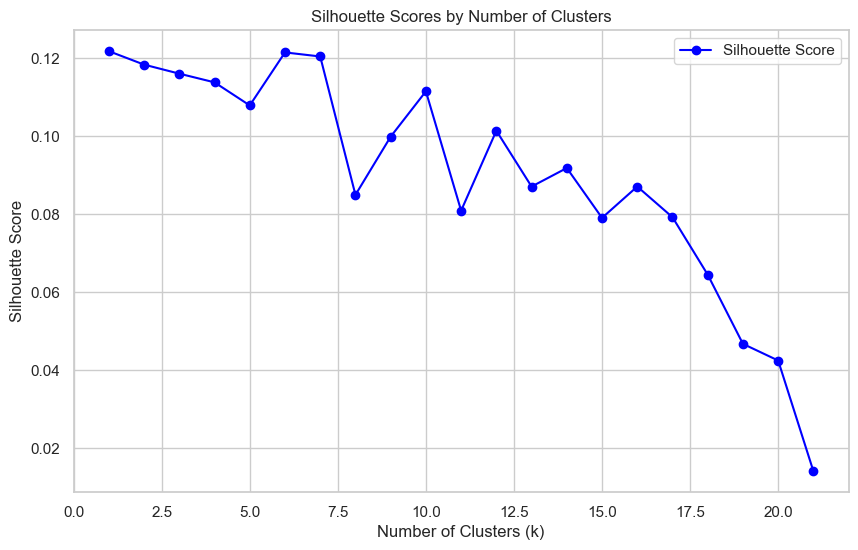

Silhouette score for best kappa: 0.144


In [11]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

text_col='content'

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_sum_3, kmeans_results = calc_clusters_with_kmeans(df=df_sum_3, text_col=text_col, max_token_length=1000, is_pca=(True, 16))

In [12]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_3 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [13]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col = 'content'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_3 =summarize_comments_by_cluster(df=df_sum_3, text_col=text_col, prompt_name=prompt_template_3, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_3 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 1
The comments provide a comprehensive look at the various challenges and responses surrounding Veterans' GI Bill payment delays. Many comments echo the frustration of veterans who have faced significant financial hardship due to delayed payments, impacting their ability to pay for necessary expenses such as rent, tuition, and other bills. The Department of Veterans Affairs (VA) has acknowledged these issues and announced initiatives to address the payment delays, yet veterans remain skeptical of the effectiveness and timeliness of these measures. Some comments show appreciation for legislative actions, such as the unanimous passing of a bill by the House to streamline the process, but also highlight that implementation remains a key concern. Other comments emphasize the emotional and psychological toll on veterans who rely on these benefits for their education and overall well-being, illustrating the broader impact beyond financial inconvenience.
-----------

In [14]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 3rd technique
final_summary_3 = final_summary_of_clustered_comments(prompt=prompt_template_final_3, gpt_model='gpt-4o', topic=topic, summaries=summaries_3)

Veterans' GI Bill payment delays have provoked widespread frustration and financial hardship among veterans, impacting their ability to pay for rent, tuition, and other essential expenses. The Department of Veterans Affairs (VA) has recognized these issues and announced measures to address the delays, but skepticism persists about their effectiveness and timeliness. Legislative actions, such as the House's unanimous passage of a bill to streamline the process, have been met with both appreciation and concern over implementation. The emotional and psychological toll on veterans highlights the broader impact beyond financial inconvenience, affecting their education and overall well-being.

New legislative updates bring changes to improve the efficiency and reach of GI Bill benefits. These include immediate assistance, extensions for Purple Heart recipients and active-duty service members under the Yellow Ribbon Program, and adjustments to benefit levels based on service percentages. Othe

### 4TH SUMMARIZATION TECHNIQUE: TOPICS EXTRACTION OF COMMENTS, CLUSTER TOPICS AND SUMMARY THE CLUSTERS

We are going to implement our final technique in which we hope to be the best. Initially, we are going to extract topics for each comment/review. Moreover, we are going to cluster them with our best performing clustering technique, and for each cluster we are going to make a summary. Finally, based on these summaries we are going to create a final summary. 

In [15]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_topics = load_chosen_prompt(prompt_name='prompt_for_topic_extraction')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['topic', 'language', 'topics', 'comment']


In [16]:
from summarization_methods.topic_extraction_clustering_and_summarization import topic_extraction

topic = "Veterans' GI Bill payment delays"
language = 'English'

# extract topics using llm's (openai gpt-4o)
df_sum_3, df_topics_3 = topic_extraction(df=df_sum_3, text_col='content', prompt_template=prompt_template_topics, gpt_model='gpt-4o', topic=topic, language=language)

print('--------------------------------------------------------------------------------------------------------------------------------')
print(f'The length of the topics that produced are: {len(df_topics_3)}')
print(f'The columns of the new dataframe are: {df_topics_3.columns}')

  1%|█▊                                                                                                                                                                                                        | 1/110 [00:01<03:31,  1.94s/it]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Education benefits', 'Promises to military', 'Military service', 'Sacrifice', 'Afghanistan', 'American soldiers']


  2%|███▋                                                                                                                                                                                                      | 2/110 [00:02<02:21,  1.31s/it]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Education benefits', 'Information-technology glitch', 'School support']


  3%|█████▌                                                                                                                                                                                                    | 3/110 [00:03<02:00,  1.13s/it]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Education benefits', 'Financial hardships', 'Communication issues', 'Government inaction', 'Student aid claims']


  4%|███████▎                                                                                                                                                                                                  | 4/110 [00:04<01:47,  1.01s/it]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Education benefits', 'Information-technology glitch', 'Government inaction', 'School support']


  5%|█████████▏                                                                                                                                                                                                | 5/110 [00:05<01:35,  1.10it/s]

extracted topics: ['Veterans', 'GI Bill', 'Education benefits', 'Government inaction', 'School support']


  5%|███████████                                                                                                                                                                                               | 6/110 [00:05<01:27,  1.19it/s]

extracted topics: ['Veterans', 'GI Bill', 'Education benefits', 'Government inaction']


  6%|████████████▊                                                                                                                                                                                             | 7/110 [00:07<01:36,  1.07it/s]

extracted topics: ['Veterans', 'Information-technology glitch', 'Government inaction', 'Education benefits']


  7%|██████████████▋                                                                                                                                                                                           | 8/110 [00:07<01:25,  1.20it/s]

extracted topics: ['Government inaction']


  8%|████████████████▌                                                                                                                                                                                         | 9/110 [00:08<01:21,  1.24it/s]

extracted topics: ['Information-technology glitch', 'Government inaction', 'Veterans', 'GI Bill', 'Payment delays']


  9%|██████████████████▎                                                                                                                                                                                      | 10/110 [00:09<01:19,  1.26it/s]

extracted topics: ['GI Bill', 'Payment delays', 'Information-technology glitch', 'Government inaction']


 10%|████████████████████                                                                                                                                                                                     | 11/110 [00:09<01:15,  1.30it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Information-technology glitch']


 11%|█████████████████████▉                                                                                                                                                                                   | 12/110 [00:10<01:13,  1.34it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 12%|███████████████████████▊                                                                                                                                                                                 | 13/110 [00:11<01:10,  1.38it/s]

extracted topics: ['Veterans', 'Government inaction', 'Payment delays']


 13%|█████████████████████████▌                                                                                                                                                                               | 14/110 [00:12<01:08,  1.39it/s]

extracted topics: ['Veterans', 'Payment delays', 'GI Bill', 'Government inaction']


 14%|███████████████████████████▍                                                                                                                                                                             | 15/110 [00:12<01:10,  1.36it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Information-technology glitch', 'Government inaction']


 15%|█████████████████████████████▏                                                                                                                                                                           | 16/110 [00:13<01:05,  1.43it/s]

extracted topics: ['GI Bill', 'Payment delays', 'Government inaction']


 15%|███████████████████████████████                                                                                                                                                                          | 17/110 [00:14<01:01,  1.51it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Information-technology glitch', 'Government inaction']


 16%|████████████████████████████████▉                                                                                                                                                                        | 18/110 [00:14<00:58,  1.57it/s]

extracted topics: ['Government inaction']


 17%|██████████████████████████████████▋                                                                                                                                                                      | 19/110 [00:15<01:01,  1.49it/s]

extracted topics: ['Government inaction', 'Payment delays']


 18%|████████████████████████████████████▌                                                                                                                                                                    | 20/110 [00:15<00:59,  1.52it/s]

extracted topics: ['Veterans', 'Payment delays', 'Government inaction']


 19%|██████████████████████████████████████▎                                                                                                                                                                  | 21/110 [00:16<00:58,  1.51it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 20%|████████████████████████████████████████▏                                                                                                                                                                | 22/110 [00:17<00:55,  1.60it/s]

extracted topics: []


 21%|██████████████████████████████████████████                                                                                                                                                               | 23/110 [00:17<00:52,  1.66it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 22%|███████████████████████████████████████████▊                                                                                                                                                             | 24/110 [00:18<00:52,  1.64it/s]

extracted topics: ['Government inaction', 'GI Bill', 'Payment delays']


 23%|█████████████████████████████████████████████▋                                                                                                                                                           | 25/110 [00:19<00:55,  1.53it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 24%|███████████████████████████████████████████████▌                                                                                                                                                         | 26/110 [00:19<00:56,  1.50it/s]

extracted topics: ['Government inaction', 'Veterans', 'GI Bill', 'Payment delays', 'Information-technology glitch']


 25%|█████████████████████████████████████████████████▎                                                                                                                                                       | 27/110 [00:20<00:52,  1.58it/s]

extracted topics: []


 25%|███████████████████████████████████████████████████▏                                                                                                                                                     | 28/110 [00:21<00:52,  1.56it/s]

extracted topics: ['GI Bill', 'Payment delays', 'Government inaction']


 26%|████████████████████████████████████████████████████▉                                                                                                                                                    | 29/110 [00:21<00:54,  1.49it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction', 'Information-technology glitch']


 27%|██████████████████████████████████████████████████████▊                                                                                                                                                  | 30/110 [00:22<00:54,  1.46it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction', 'Information-technology glitch']


 28%|████████████████████████████████████████████████████████▋                                                                                                                                                | 31/110 [00:23<00:55,  1.44it/s]

extracted topics: ['Information-technology glitch', 'Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 29%|██████████████████████████████████████████████████████████▍                                                                                                                                              | 32/110 [00:23<00:53,  1.45it/s]

extracted topics: ['GI Bill', 'Payment delays']


 30%|████████████████████████████████████████████████████████████▎                                                                                                                                            | 33/110 [00:24<00:50,  1.52it/s]

extracted topics: []


 31%|██████████████████████████████████████████████████████████████▏                                                                                                                                          | 34/110 [00:25<00:49,  1.54it/s]

extracted topics: ['Veterans', 'Payment delays', 'Government inaction']


 32%|███████████████████████████████████████████████████████████████▉                                                                                                                                         | 35/110 [00:25<00:46,  1.61it/s]

extracted topics: []


 33%|█████████████████████████████████████████████████████████████████▊                                                                                                                                       | 36/110 [00:26<00:46,  1.61it/s]

extracted topics: ['GI Bill', 'Payment delays', 'Veterans']


 34%|███████████████████████████████████████████████████████████████████▌                                                                                                                                     | 37/110 [00:26<00:47,  1.54it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Government inaction']


 35%|█████████████████████████████████████████████████████████████████████▍                                                                                                                                   | 38/110 [00:27<00:47,  1.51it/s]

extracted topics: ['Veterans', 'GI Bill', 'Information-technology glitch', 'Government inaction']


 35%|███████████████████████████████████████████████████████████████████████▎                                                                                                                                 | 39/110 [00:28<00:46,  1.53it/s]

extracted topics: ['Information-technology glitch', 'Government inaction']


 36%|█████████████████████████████████████████████████████████████████████████                                                                                                                                | 40/110 [00:28<00:44,  1.59it/s]

extracted topics: ['Veterans', 'GI Bill', 'Information-technology glitch', 'Government inaction']


 37%|██████████████████████████████████████████████████████████████████████████▉                                                                                                                              | 41/110 [00:29<00:44,  1.56it/s]

extracted topics: ['Payment delays', 'Veterans', 'GI Bill']


 38%|████████████████████████████████████████████████████████████████████████████▋                                                                                                                            | 42/110 [00:30<00:48,  1.41it/s]

extracted topics: ['Veterans', 'Government inaction']


 39%|██████████████████████████████████████████████████████████████████████████████▌                                                                                                                          | 43/110 [00:31<00:45,  1.46it/s]

extracted topics: ['Veterans', 'Payment delays', 'Government inaction']


 40%|████████████████████████████████████████████████████████████████████████████████▍                                                                                                                        | 44/110 [00:31<00:43,  1.51it/s]

extracted topics: ['Government inaction', 'Universities help']


 41%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                      | 45/110 [00:32<00:42,  1.53it/s]

extracted topics: ['Veterans', 'Universities help']


 42%|████████████████████████████████████████████████████████████████████████████████████                                                                                                                     | 46/110 [00:32<00:41,  1.54it/s]

extracted topics: ['Universities help', 'Budget concerns']


 43%|█████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                   | 47/110 [00:33<00:36,  1.71it/s]

extracted topics: []


 44%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                 | 48/110 [00:34<00:37,  1.65it/s]

extracted topics: ['Veterans', 'Universities help']


 45%|█████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                               | 49/110 [00:34<00:36,  1.65it/s]

extracted topics: ['Universities help', 'Payment delays']


 45%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                             | 50/110 [00:35<00:38,  1.56it/s]

extracted topics: ['Government inaction', 'Payment delays', 'Veterans', 'Universities help']


 46%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                           | 51/110 [00:35<00:37,  1.57it/s]

extracted topics: ['Payment delays', 'Veterans', 'GI Bill']


 47%|███████████████████████████████████████████████████████████████████████████████████████████████                                                                                                          | 52/110 [00:36<00:38,  1.49it/s]

extracted topics: ['Veterans', 'GI Bill', 'Payment delays', 'Universities help', 'Information-technology glitch']


 48%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                        | 53/110 [00:37<00:35,  1.59it/s]

extracted topics: []


 49%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                      | 54/110 [00:37<00:32,  1.71it/s]

extracted topics: ['Universities help', 'Payment delays']


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                    | 55/110 [00:38<00:32,  1.69it/s]

extracted topics: ['Payment delays', 'Government inaction']


 51%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                  | 56/110 [00:38<00:32,  1.69it/s]

extracted topics: ['Payment delays', 'Universities help']


 52%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                                | 57/110 [00:39<00:32,  1.62it/s]

extracted topics: ['Payment delays', 'Government inaction', 'Veterans']


 53%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                               | 58/110 [00:40<00:31,  1.63it/s]

extracted topics: ['Veterans', 'Payment delays', 'Universities help']


 54%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                             | 59/110 [00:40<00:30,  1.66it/s]

extracted topics: ['Payment delays', 'Veterans', 'Information-technology glitch', 'Universities help']


 55%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                           | 60/110 [00:41<00:31,  1.58it/s]

extracted topics: ['Payment delays', 'GI Bill', 'Veterans']


 55%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                         | 61/110 [00:42<00:30,  1.58it/s]

extracted topics: ['Payment delays', 'Veterans', 'Universities help']


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                       | 62/110 [00:42<00:29,  1.63it/s]

extracted topics: []


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                      | 63/110 [00:43<00:29,  1.61it/s]

extracted topics: ['Universities help', 'Veterans']


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                    | 64/110 [00:43<00:28,  1.61it/s]

extracted topics: ['Veterans', 'Payment delays', 'Universities help']


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 65/110 [00:44<00:27,  1.64it/s]

extracted topics: ['Payment delays', 'Government inaction']


 60%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                | 66/110 [00:45<00:26,  1.64it/s]

extracted topics: ['Payment delays', 'Government inaction']


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                              | 67/110 [00:45<00:26,  1.61it/s]

extracted topics: ['Payment delays', 'Government inaction', 'Veterans']


 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 68/110 [00:46<00:25,  1.66it/s]

extracted topics: []


 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 69/110 [00:46<00:24,  1.71it/s]

extracted topics: []


 64%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 70/110 [00:47<00:22,  1.76it/s]

extracted topics: []


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 71/110 [00:47<00:21,  1.81it/s]

extracted topics: []


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                     | 72/110 [00:48<00:19,  1.95it/s]

extracted topics: []


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 73/110 [00:49<00:20,  1.79it/s]

extracted topics: ['GI Bill', 'Veterans']


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                 | 74/110 [00:49<00:20,  1.77it/s]

extracted topics: ['Veterans', 'GI Bill']


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 75/110 [00:50<00:19,  1.81it/s]

extracted topics: ['GI Bill', 'Veterans']


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                              | 76/110 [00:50<00:18,  1.79it/s]

extracted topics: ['GI Bill']


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 77/110 [00:51<00:18,  1.75it/s]

extracted topics: ['GI Bill']


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 78/110 [00:51<00:18,  1.72it/s]

extracted topics: ['GI Bill']


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                        | 79/110 [00:52<00:17,  1.78it/s]

extracted topics: ['GI Bill', 'Veterans']


 73%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                      | 80/110 [00:53<00:17,  1.76it/s]

extracted topics: ['GI Bill']


 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 81/110 [00:53<00:16,  1.78it/s]

extracted topics: ['GI Bill', 'Universities help', 'Veterans']


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 82/110 [00:54<00:15,  1.78it/s]

extracted topics: []


 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 83/110 [00:54<00:16,  1.69it/s]

extracted topics: ['GI Bill', 'Government inaction']


 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 84/110 [00:55<00:15,  1.63it/s]

extracted topics: ['GI Bill']


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                             | 85/110 [00:56<00:15,  1.60it/s]

extracted topics: ['Veterans', 'GI Bill']


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                           | 86/110 [00:56<00:15,  1.59it/s]

extracted topics: ['GI Bill', 'Veterans']


 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 87/110 [00:57<00:13,  1.65it/s]

extracted topics: []


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                        | 88/110 [00:57<00:13,  1.67it/s]

extracted topics: []


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                      | 89/110 [00:58<00:12,  1.69it/s]

extracted topics: ['GI Bill']


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 90/110 [00:58<00:11,  1.75it/s]

extracted topics: []


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 91/110 [00:59<00:10,  1.76it/s]

extracted topics: []


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                 | 92/110 [01:00<00:10,  1.69it/s]

extracted topics: []


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 93/110 [01:00<00:10,  1.65it/s]

extracted topics: ['GI Bill']


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 94/110 [01:01<00:09,  1.70it/s]

extracted topics: []


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 95/110 [01:02<00:09,  1.61it/s]

extracted topics: []


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                         | 96/110 [01:02<00:08,  1.66it/s]

extracted topics: []


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 97/110 [01:03<00:07,  1.68it/s]

extracted topics: ['GI Bill']


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      | 98/110 [01:04<00:08,  1.44it/s]

extracted topics: ['GI Bill']


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 99/110 [01:05<00:08,  1.26it/s]

extracted topics: ['GI Bill', 'Veterans']


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 100/110 [01:05<00:07,  1.40it/s]

extracted topics: []


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 101/110 [01:06<00:06,  1.43it/s]

extracted topics: ['Veterans', 'GI Bill', 'Technology courses', 'Educational assistance']


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 102/110 [01:06<00:05,  1.50it/s]

extracted topics: ['Educational assistance', 'Veterans']


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 103/110 [01:07<00:04,  1.55it/s]

extracted topics: ['Educational assistance']


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 104/110 [01:08<00:03,  1.63it/s]

extracted topics: ['Educational assistance']


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 105/110 [01:08<00:03,  1.58it/s]

extracted topics: ['GI Bill', 'Educational assistance', 'Technical schools', 'Postsecondary vocational institutions']


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 106/110 [01:09<00:02,  1.67it/s]

extracted topics: ['Veterans', 'Educational assistance', 'Universities help']


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 107/110 [01:09<00:01,  1.68it/s]

extracted topics: ['Educational assistance', 'Technology courses']


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 108/110 [01:10<00:01,  1.47it/s]

extracted topics: ['GI Bill', 'Educational assistance', 'Guard and Reserve members', 'Post-9/11 benefits']


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 109/110 [01:11<00:00,  1.52it/s]

extracted topics: []


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [01:11<00:00,  1.53it/s]

extracted topics: ['GI Bill', 'Post-9/11 benefits', 'Educational assistance']
--------------------------------------------------------------------------------------------------------------------------------
The length of the topics that produced are: 263
The columns of the new dataframe are: Index(['comment', 'topics'], dtype='object')


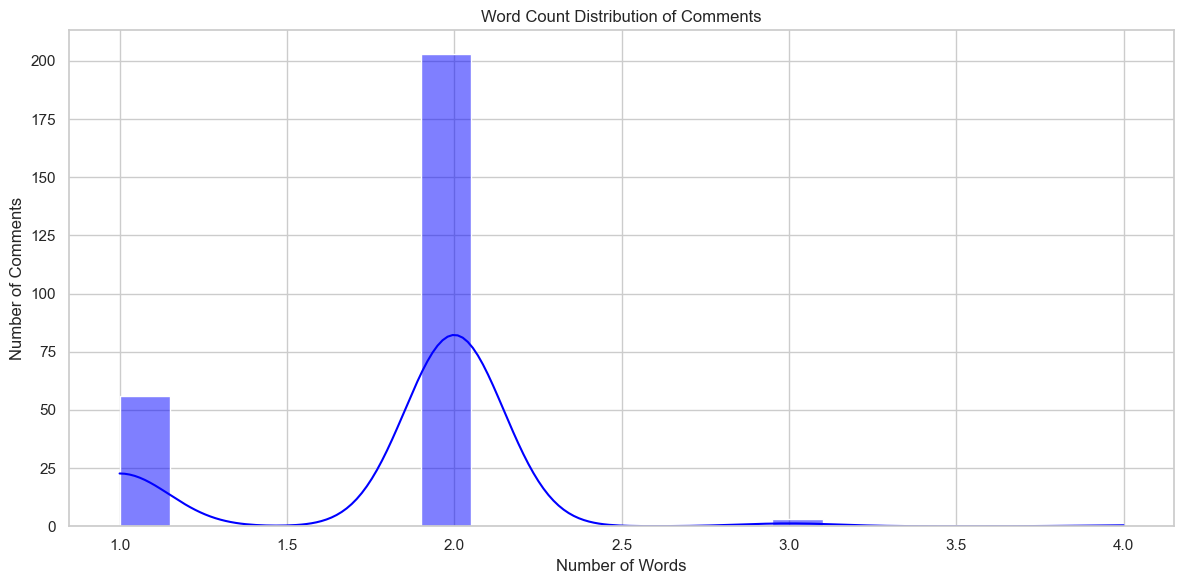

In [17]:
text_col='topics'

# plot the distribution of words
plot_distribution_of_words(df_topics_3, text_col)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [01:25<00:00,  3.06it/s]


Using PCA to transformed embeddings


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:22<00:00,  2.18it/s]

The optimum kappa based on Penalized Silhouette score is: 11


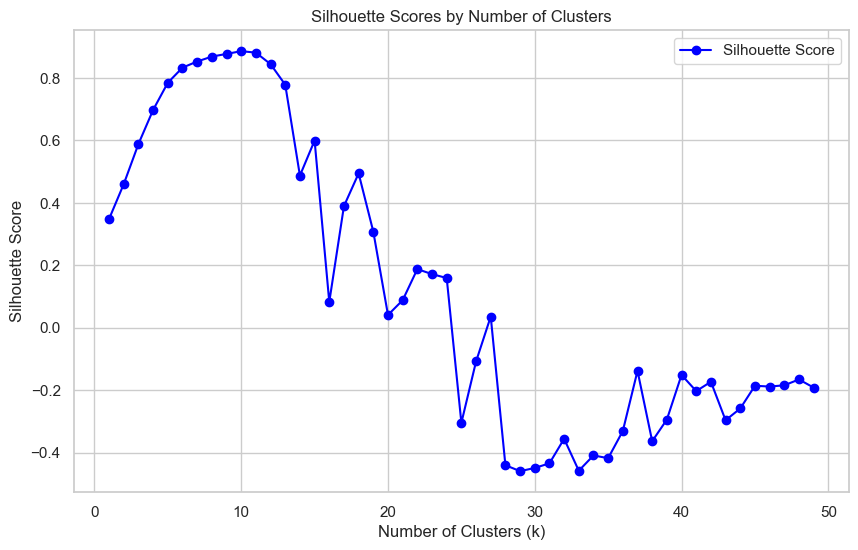

Silhouette score for best kappa: 0.936


In [18]:
from summarization_methods.topic_extraction_clustering_and_summarization import calc_clusters_with_kmeans

# calculate the optimun kappa with KMeans via Silhouette score and using OPENAI embeddings ADA-002
df_topics_4, kmeans_results_2 = calc_clusters_with_kmeans(df=df_topics_3, text_col=text_col, max_token_length=4000, is_pca=(True, 16))

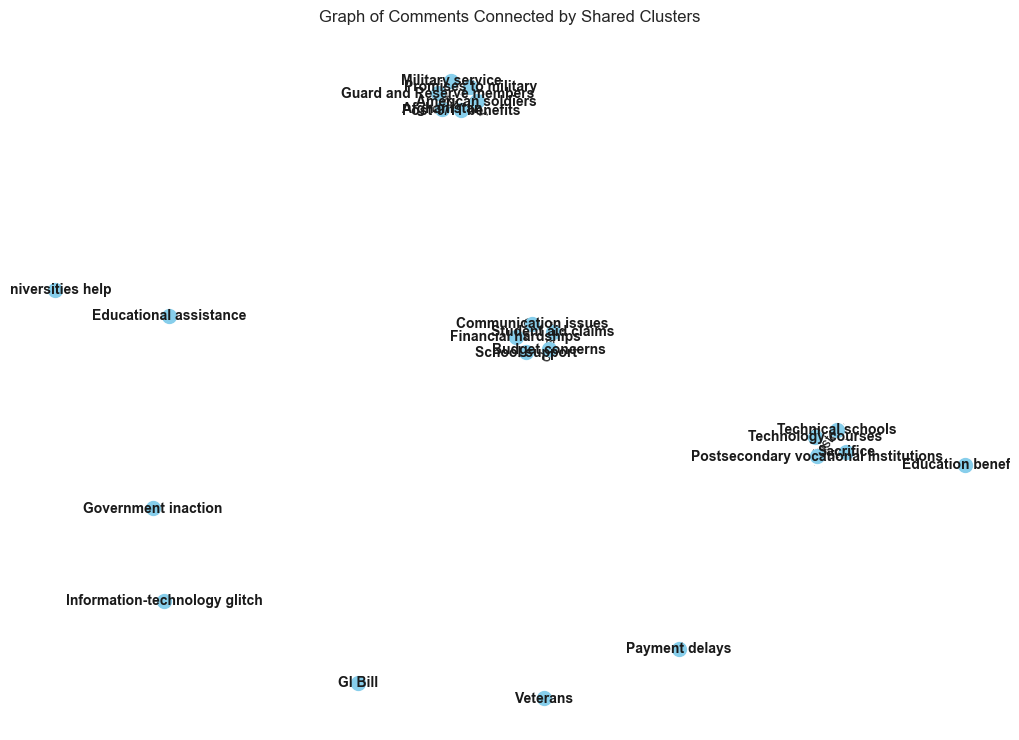

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Step 1: Create a graph
G = nx.Graph()

# Add nodes (comments)
for comment in df_topics_4['topics'].unique():
    G.add_node(comment)

# Step 2: Add edges based on shared clusters
cluster_to_comments = {}

for index, row in df_topics_4.iterrows():
    comment_id = row['topics']
    cluster_label = row['labels']
    
    if cluster_label not in cluster_to_comments:
        cluster_to_comments[cluster_label] = set()
    cluster_to_comments[cluster_label].add(comment_id)

# Step 3: Connect comments that share clusters
for comments in cluster_to_comments.values():
    comments = list(comments)
    for i in range(len(comments)):
        for j in range(i + 1, len(comments)):
            G.add_edge(comments[i], comments[j])

# Step 4: Plot the graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # Spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color='gray', font_size=10, font_weight='bold')

# Draw edge labels to represent shared clusters
edge_labels = {(u, v): f'cluster' for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph of Comments Connected by Shared Clusters")
plt.show()

In [19]:
# rename the columns and merge the proper
df_sum_3 = df_sum_3.reset_index().rename(columns={'index': 'comment_id'})
df_topics_4 = df_topics_4.rename(columns={'comment': 'comment_id'})

df_topics_4 = df_topics_4.merge(df_sum_3[['content', 'comment_id']], how='inner', on='comment_id')

grouped_comments_4 = df_topics_4.groupby('labels').agg(
    comments=('content', lambda x: list(x)),
    topics=('topics', lambda x: set(x)),
    comments_count=('comment_id', lambda x: len(list(x)))
    )

grouped_comments_4 = grouped_comments_4.reset_index()

In [20]:
from utils.load_prompts import load_chosen_prompt

# load the prompt template for summarizing comments grouped by label
prompt_template_4 = load_chosen_prompt(prompt_name='prompt_for_summarizing_multiple_comments')

The number of arguments to contain in the prompt are: 4
The required arguments are: ['language', 'topic', 'previous_summaries', 'comments']


In [21]:
from summarization_methods.topic_extraction_clustering_and_summarization import summarize_comments_by_cluster

text_col='comments'
language = 'English'
topic = "Veterans' GI Bill payment delays"

# produce the summaries for grouped comments by label
summaries_4 =summarize_comments_by_cluster(df=grouped_comments_4, text_col=text_col, prompt_name=prompt_template_4, gpt_model='gpt-4o', language=language, topic=topic)
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# load the prompt template for the final summary
prompt_template_final_4 = load_chosen_prompt(prompt_name='final_prompt_for_summarizing_multiple_summaries')

Summary for cluster label: 0
Veterans are expressing significant frustration over delays in their GI Bill payments by the U.S. Department of Veterans Affairs, impacting their ability to pay for tuition, housing, and other essential expenses. Many comments highlight the financial strain and stress caused by the payment delays, with some veterans reporting that they have had to take out loans, max out credit cards, or even face eviction due to lack of funds. The issue has also affected veterans' academic performance and mental health, exacerbating feelings of neglect and disappointment with the system they had hoped would support them. Suggestions from the community include calls for improved communication and transparency from the VA, faster processing times, and more robust support mechanisms to ensure timely payments. Overall, the comments reflect a deep sense of urgency and a plea for immediate action to rectify the situation.
---------------------------------------------------------

In [22]:
from summarization_methods.topic_extraction_clustering_and_summarization import final_summary_of_clustered_comments

# produce the final summary for the 4th technique
final_summary_4 = final_summary_of_clustered_comments(prompt=prompt_template_final_4, gpt_model='gpt-4o', topic=topic, summaries=summaries_4)

Veterans are facing substantial frustration and financial hardship due to persistent delays in GI Bill payments by the U.S. Department of Veterans Affairs (VA). The delays have severely impacted their ability to cover essential expenses such as tuition, housing, and daily needs, leading many to take out loans, max out credit cards, or face possible eviction. This financial instability has also negatively affected veterans' academic performance and mental health, exacerbating feelings of neglect and abandonment. The community consistently calls for improved communication, expedited payment processing, and enhanced support mechanisms from the VA. There is a strong, unified demand for immediate, effective solutions to remedy these payment issues and uphold the VA's commitments, ensuring the financial and emotional stability of veterans.


### STORE THE FINAL SUMMARIES IN A CSV

In [23]:
final_summaries = {
    'original_summary': original_summary, 
    'random_grouping_summarization': final_summary_1,
    'label_based_summarization': final_summary_2,
    'cluster_based_summarization': final_summary_3,
    'topic_extraction_cluster_based_summarization': final_summary_4
}

# Convert dictionary to DataFrame, with the keys as 'technique' and values as 'summary'
final_summaries_df = pd.DataFrame.from_dict(final_summaries, orient='index', columns=['summary']).reset_index()
final_summaries_df.rename(columns={'index': 'technique'}, inplace=True)

final_summaries_df.to_csv('outputs/final_summaries_2.csv', index=False)

In [24]:
final_summaries_df

,technique,summary
0,original_summary,– a major snafu has hit benefit payments to st...
1,random_grouping_summarization,The comments on Veterans' GI Bill payment dela...
2,label_based_summarization,The summarized comments on Veterans' GI Bill p...
3,cluster_based_summarization,Veterans' GI Bill payment delays have provoked...
4,topic_extraction_cluster_based_summarization,Veterans are facing substantial frustration an...


In [25]:
import pandas as pd

final_summaries_df = pd.read_csv('outputs/final_summaries.csv')

### BENCMARKING BASED ON THE EXTRACTED SUMMARIES OF THE THREE (3) TECHNIQUES

The evaluation will become by using these metrics: ROUGE score, BLEU score and BERTScore

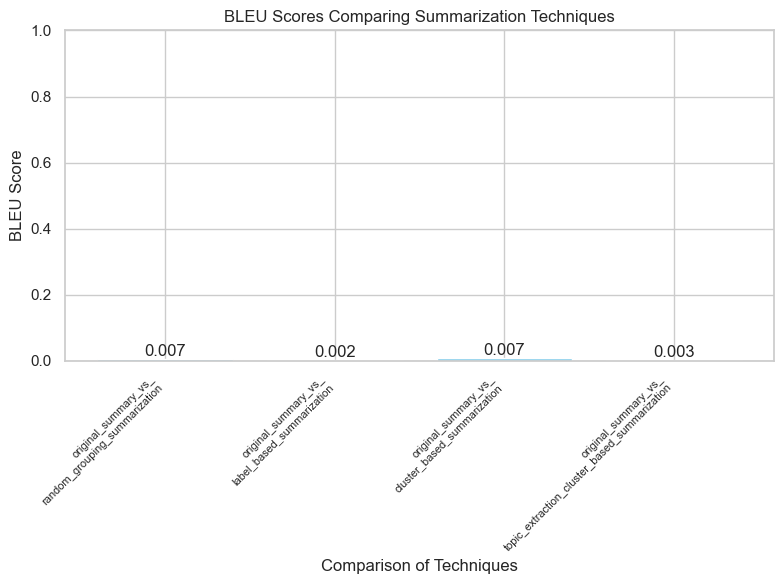

In [26]:
from utils.benchmark_summaries import calc_and_plot_bleu_scores

bleu_scores = calc_and_plot_bleu_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

In [27]:
for summary in final_summaries_df.summary:
    print(summary)
    print('---------------------------------------------------------------------------------')

– a major snafu has hit benefit payments to student veterans under the gi bill — and congressional aides tells nbc that they have been told the veterans are never going to be paid back . the aides say they were told by the department of veterans affairs that the va will not be making retroactive payments to veterans who were underpaid for their housing allowance because it would mean reviewing around 2 millions claims , further delaying implementation of a new system , which has already been pushed back to dec. 2019. under the forever gi bill signed into law by president trump last year , students are supposed to be paid housing allowance based on where they take the most classes , not on where the school ' s main campus is located . tanya ang , vice president of veterans education success , tells the military times that the va ' s excuse of retroactive payments creating too much work isn ' t good enough . " that could be hundreds of dollars for some students — per month , " she says .

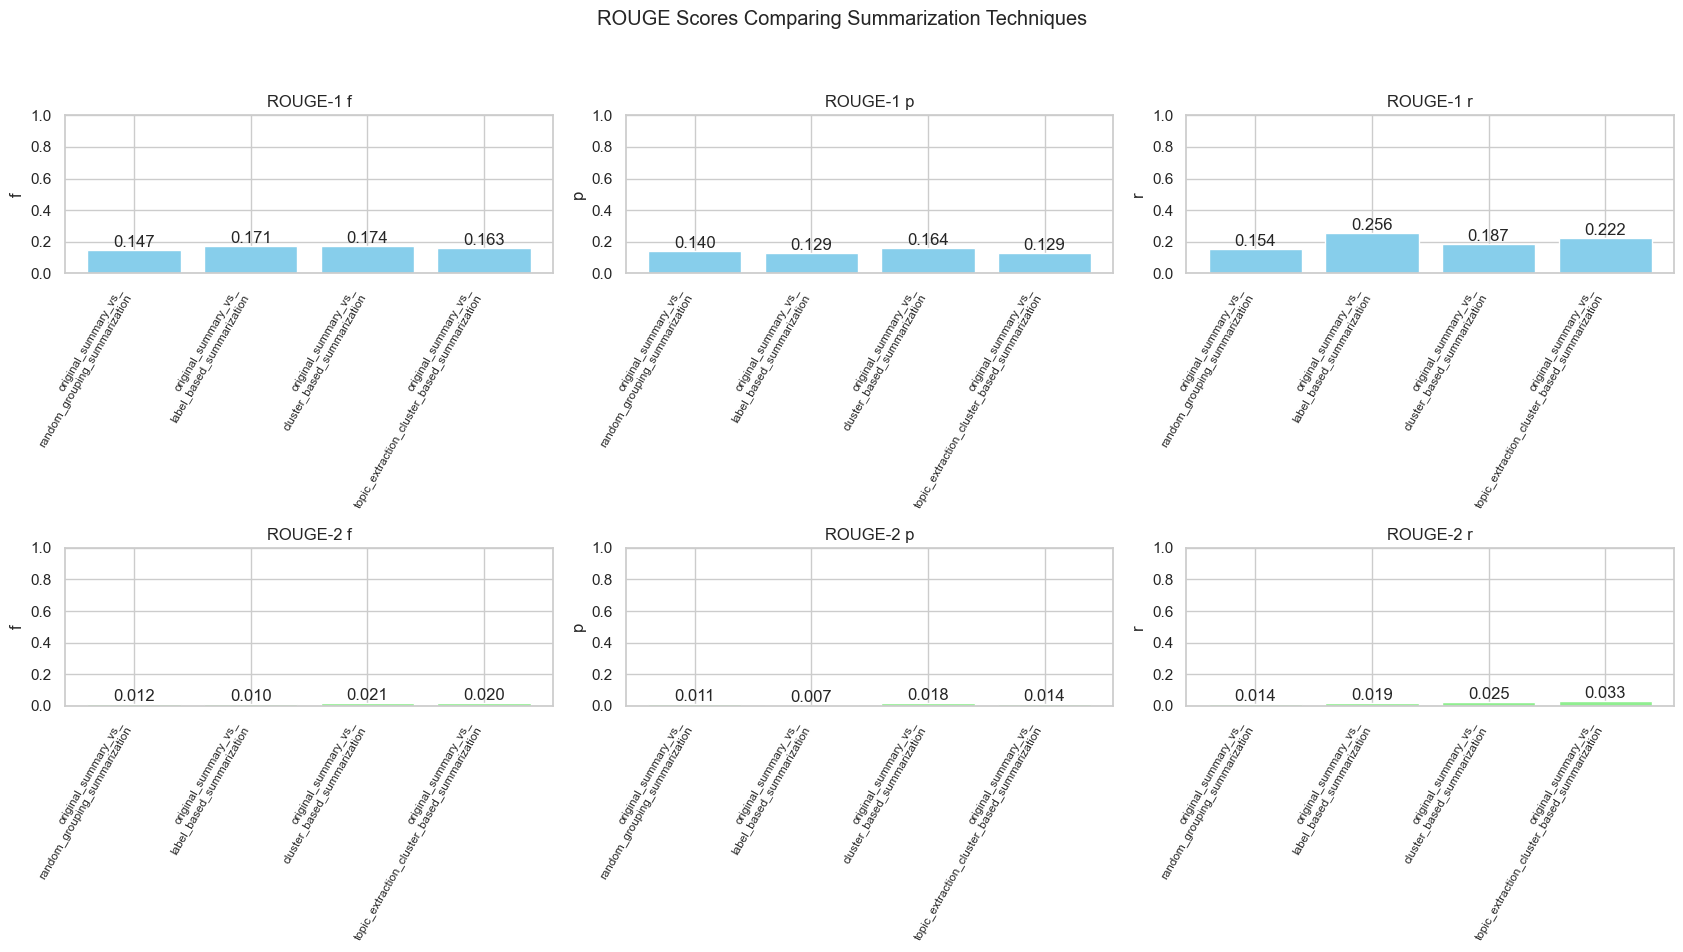

In [28]:
from utils.benchmark_summaries import calc_and_plot_rouge_scores

rouge_scores = calc_and_plot_rouge_scores(summaries_df=final_summaries_df,
                                        text_col='summary', title_col='technique')

C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\1. Python\LLM_mods_Topic_Modelling\venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


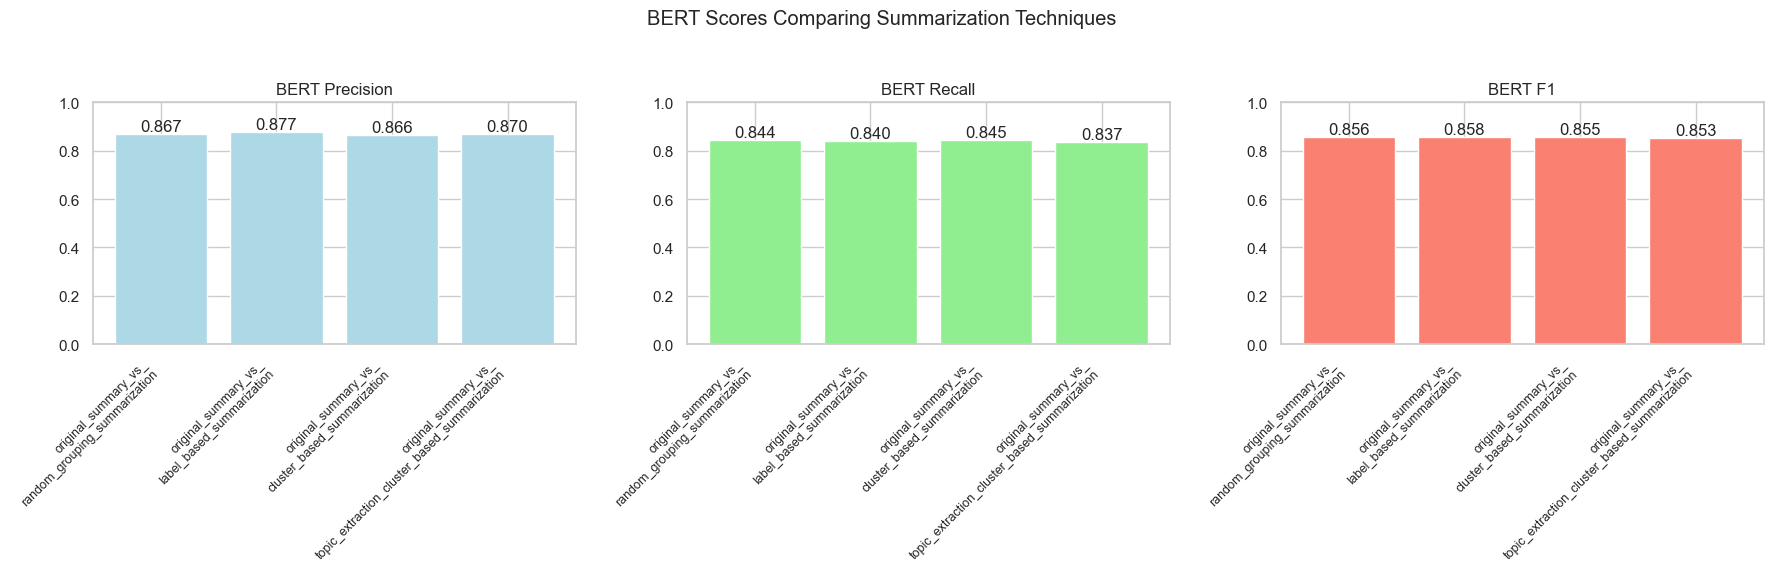

In [29]:
from utils.benchmark_summaries import calc_and_plot_bert_scores

bert_scores = calc_and_plot_bert_scores(summaries_df=final_summaries_df,
                                        text_col='summary',
                                        title_col='technique',
                                        model_to_use='princeton-nlp/sup-simcse-roberta-large',
                                        text_lang='en')